Processed Firing Rates Head:
file_name  spike_array_horizontal_line.pkl  spike_array_image_135.pkl  \
neuron_id                                                               
0                                      0.0                        5.0   
1                                      0.0                        5.0   
2                                      0.0                        5.0   
15                                     0.0                        0.0   
16                                     0.0                        0.0   

file_name  spike_array_image_45.pkl  spike_array_vertical_line.pkl  
neuron_id                                                           
0                               0.0                            0.0  
1                               0.0                            0.0  
2                               0.0                            0.0  
15                              0.0                            5.0  
16                              0.0          

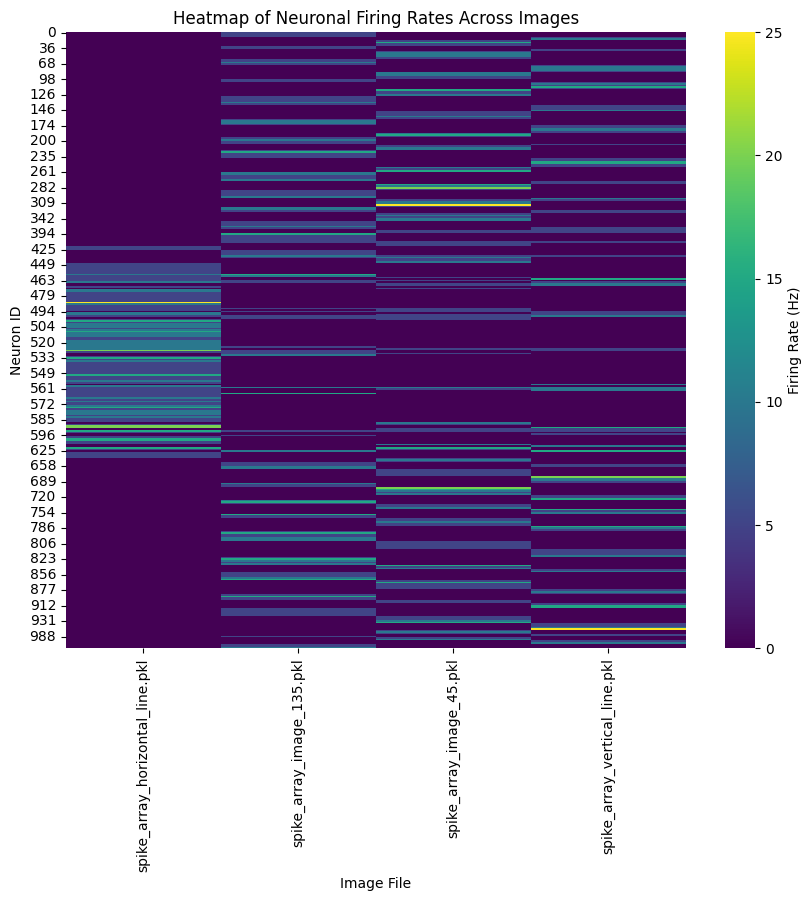

Descriptive Statistics of Firing Rates:
file_name  spike_array_horizontal_line.pkl  spike_array_image_135.pkl  \
count                           398.000000                 398.000000   
mean                              2.198492                   2.123116   
std                               4.108515                   3.664441   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               0.000000                   0.000000   
75%                               5.000000                   5.000000   
max                              25.000000                  15.000000   

file_name  spike_array_image_45.pkl  spike_array_vertical_line.pkl  
count                    398.000000                     398.000000  
mean                       2.336683                       1.896985  
std                        4.085634                       3.917530  
min                       

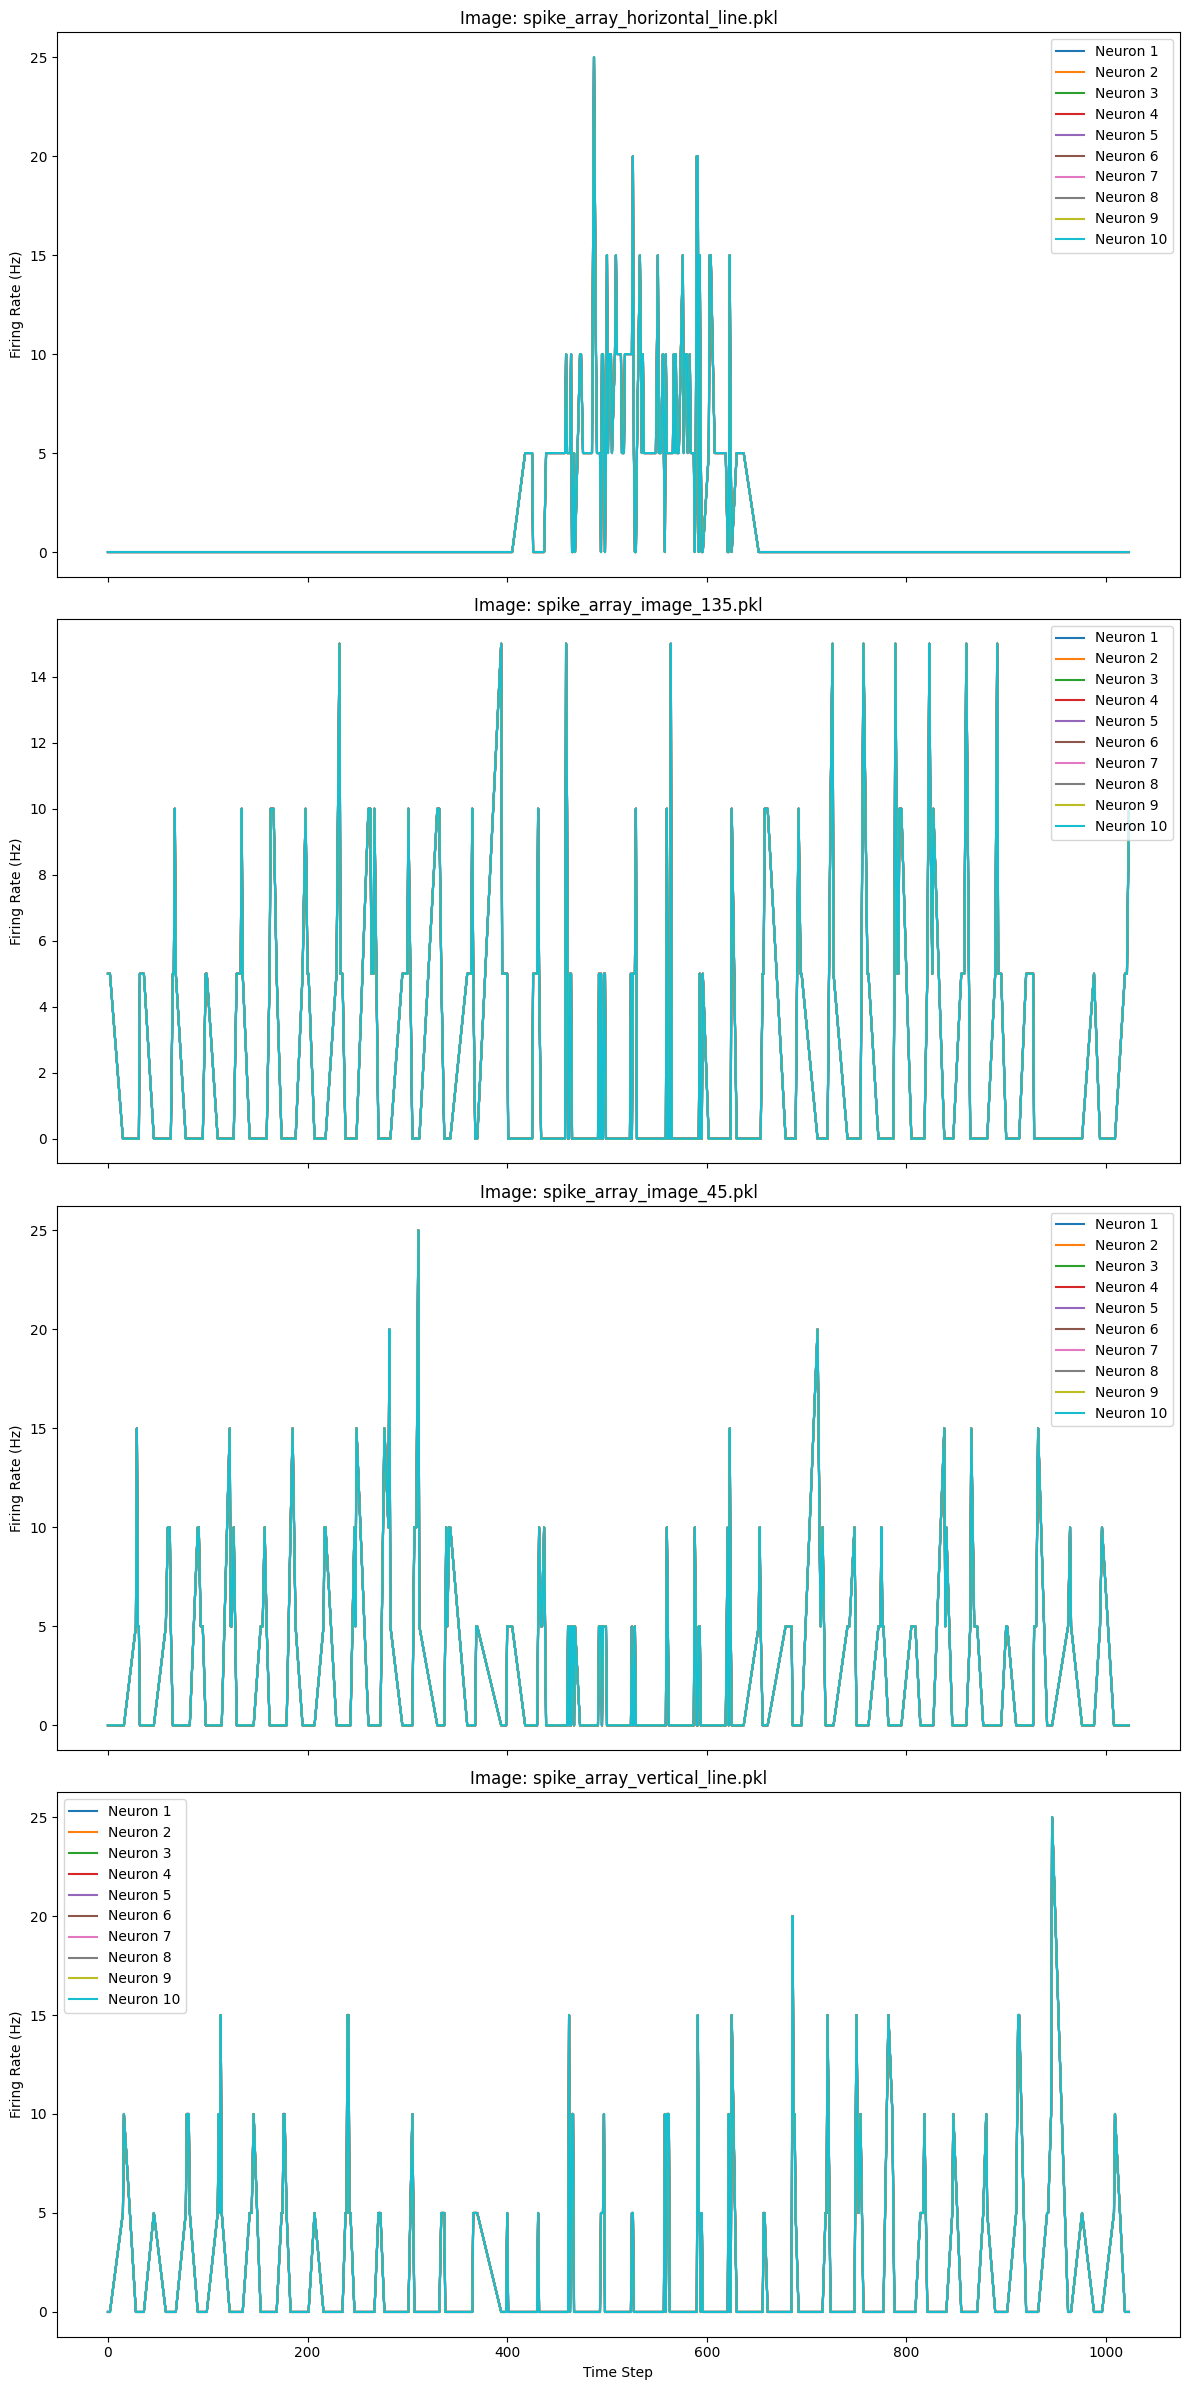

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_input_rates(input_rates, num_neurons_to_plot=10):
    """Plots the input firing rates over time for each image in separate subplots."""
    num_images = input_rates.shape[1]
    fig, axes = plt.subplots(num_images, 1, figsize=(12, 6 * num_images), sharex=True)

    if num_images == 1:
        axes = [axes]

    for idx, (image_file, rates) in enumerate(input_rates.items()):
        ax = axes[idx]
        for neuron_idx in range(min(num_neurons_to_plot, len(rates))):
            ax.plot(rates.index, rates.values, label=f'Neuron {neuron_idx+1}')
        ax.set_title(f'Image: {image_file}')
        ax.set_ylabel('Firing Rate (Hz)')
        ax.legend()

    plt.xlabel('Time Step')
    plt.tight_layout()
    plt.show()

# Load the spike dataset
spike_data = pd.read_csv('spike_dataset.csv')

# Filter out neurons with no spikes
spike_data = spike_data[spike_data['spike_times'] != '[]']

# Define the time window for firing rate calculation
time_window = 200  # ms

# Function to calculate firing rate
def calculate_firing_rate(spike_times, window):
    spike_times = eval(spike_times)
    return len(spike_times) / (window / 1000)  # firing rate in Hz

# Apply the function to calculate firing rates
spike_data['firing_rate'] = spike_data['spike_times'].apply(lambda x: calculate_firing_rate(x, time_window))

# Create a DataFrame for firing rates
firing_rate_df = spike_data.pivot(index='neuron_id', columns='file_name', values='firing_rate')

# Fill NaN values with 0 (if preferred)
firing_rate_df.fillna(0, inplace=True)

# Save the firing rates to a CSV file
firing_rate_df.to_csv('processed_firing_rates.csv')

# Display the cleaned firing rates DataFrame
print("Processed Firing Rates Head:")
print(firing_rate_df.head())

# Visualize the firing rates using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(firing_rate_df, cmap='viridis', cbar_kws={'label': 'Firing Rate (Hz)'})
plt.title('Heatmap of Neuronal Firing Rates Across Images')
plt.xlabel('Image File')
plt.ylabel('Neuron ID')
plt.show()

# Statistical analysis: Descriptive statistics
print("Descriptive Statistics of Firing Rates:")
print(firing_rate_df.describe())

# Plot the input rates
plot_input_rates(firing_rate_df)


The generated spike array contains numerous empty lists, indicating periods with no spikes, and some lists with spike times. This pattern is expected, as the Poisson spike train generation will produce sparse firing based on pixel intensity changes.

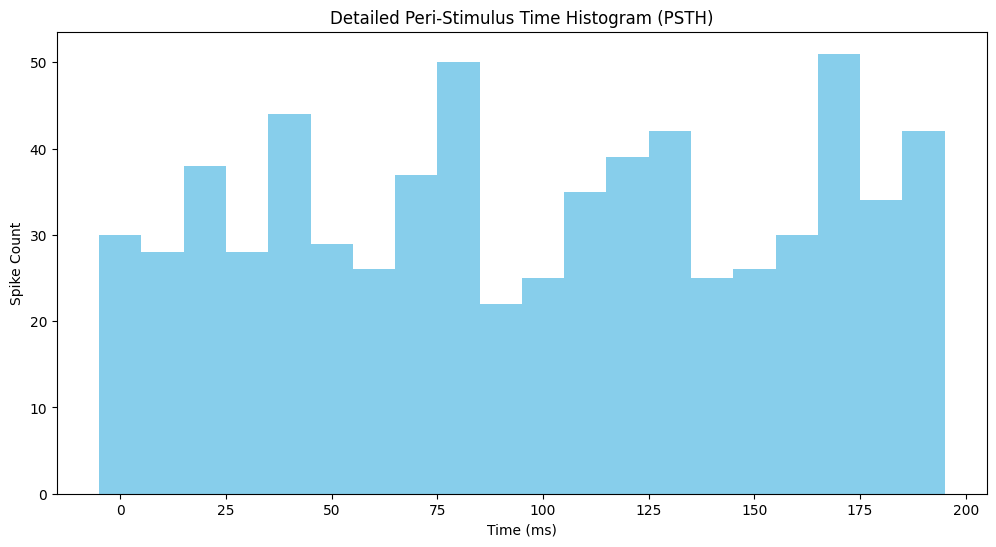

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming spike_dataset is the DataFrame containing the spike data
def detailed_psth_analysis(spiking_data, bin_size=10):
    all_spike_times = []
    for spike_times in spiking_data['spike_times']:
        spike_times = eval(spike_times)  # Convert string representation of list to actual list
        all_spike_times.extend(spike_times)
    
    max_time = max(all_spike_times) if all_spike_times else 0
    bins = np.arange(0, max_time + bin_size, bin_size)
    
    psth, _ = np.histogram(all_spike_times, bins=bins)
    
    return bins[:-1], psth

def plot_detailed_psth(bins, psth, title='Detailed Peri-Stimulus Time Histogram (PSTH)'):
    plt.figure(figsize=(12, 6))
    plt.bar(bins, psth, width=bins[1]-bins[0], color='skyblue')
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike Count')
    plt.title(title)
    plt.show()

# Compute and plot detailed PSTH
bins, psth = detailed_psth_analysis(spike_data)
plot_detailed_psth(bins, psth)


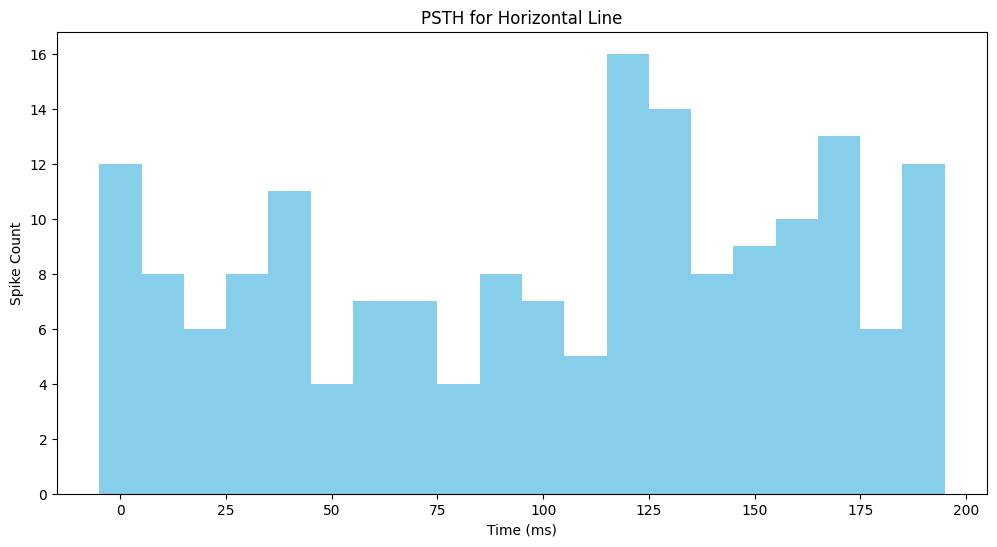

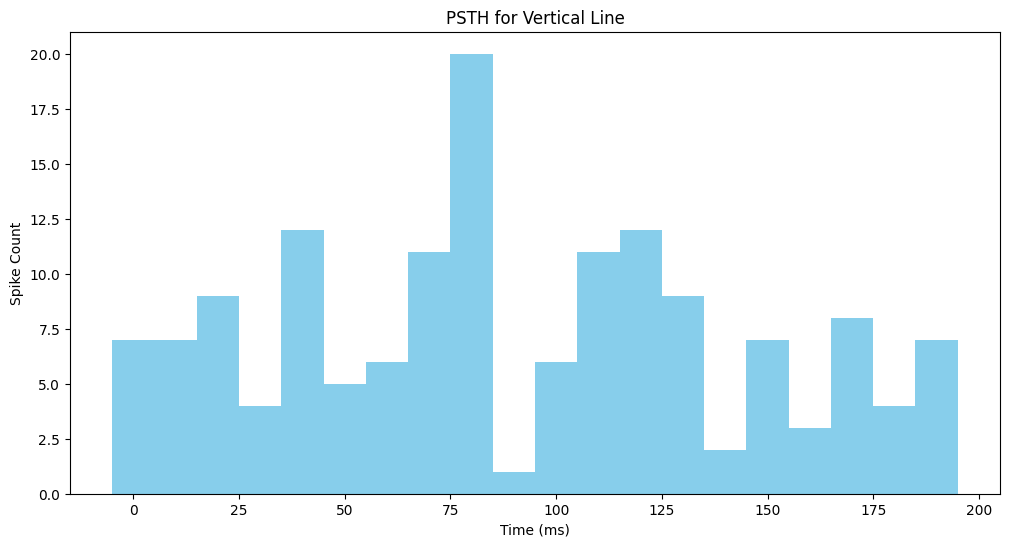

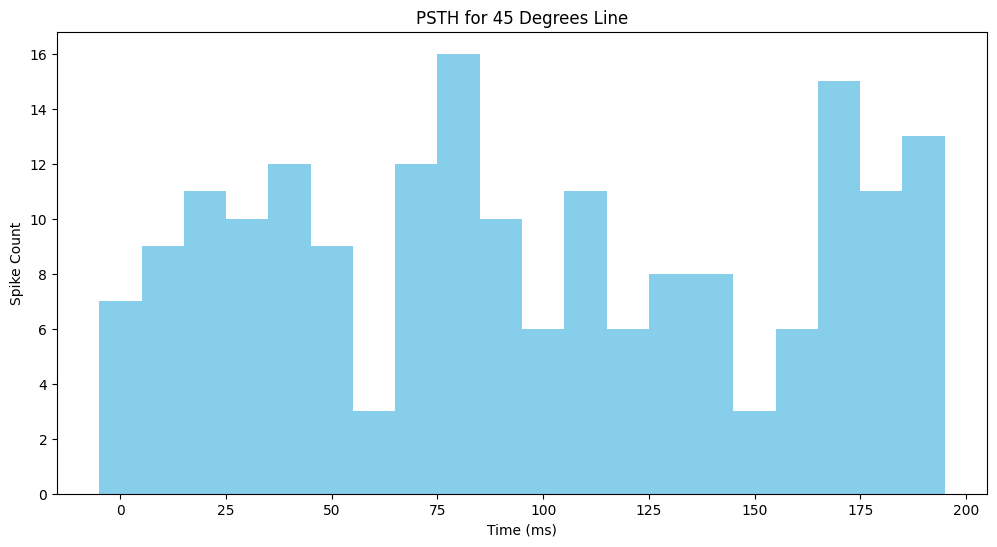

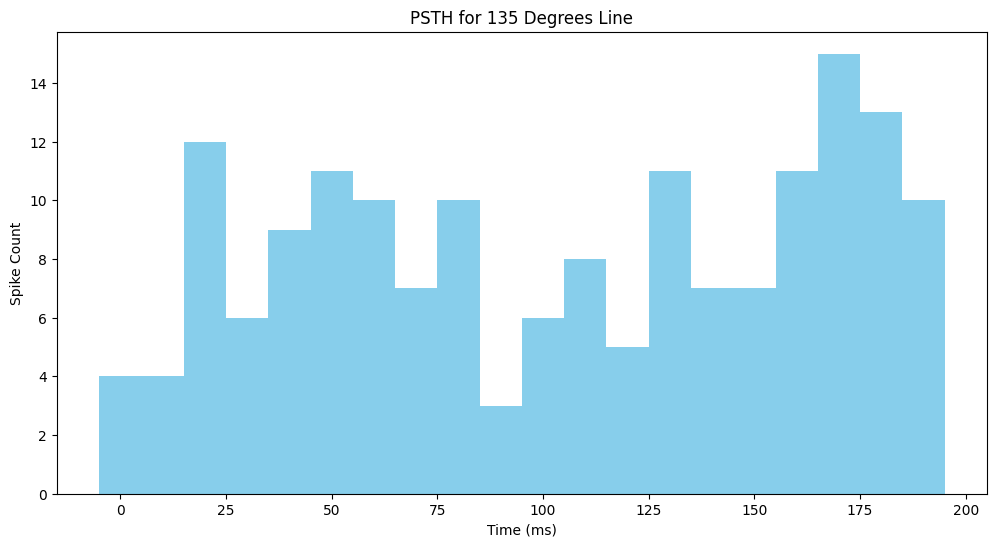

In [31]:
import pandas as pd

# Load the dataset
dataset_path = 'spike_dataset.csv'
spike_dataset = pd.read_csv(dataset_path)

# Function to filter dataset by image file name
def filter_by_image(spiking_data, image_name):
    return spiking_data[spiking_data['file_name'].str.contains(image_name)]

# Filter datasets by image names
horizontal_data = filter_by_image(spike_dataset, 'horizontal_line')
vertical_data = filter_by_image(spike_dataset, 'vertical_line')
image_45_data = filter_by_image(spike_dataset, 'image_45')
image_135_data = filter_by_image(spike_dataset, 'image_135')

# Display datasets
horizontal_data.head(), vertical_data.head(), image_45_data.head(), image_135_data.head()

def detailed_psth_analysis(spiking_data, bin_size=10):
    all_spike_times = []
    for spike_times in spiking_data['spike_times']:
        spike_times = eval(spike_times)  # Convert string representation of list to actual list
        all_spike_times.extend(spike_times)
    
    max_time = max(all_spike_times) if all_spike_times else 0
    bins = np.arange(0, max_time + bin_size, bin_size)
    
    psth, _ = np.histogram(all_spike_times, bins=bins)
    
    return bins[:-1], psth

def plot_detailed_psth(bins, psth, title='Detailed Peri-Stimulus Time Histogram (PSTH)'):
    plt.figure(figsize=(12, 6))
    plt.bar(bins, psth, width=bins[1]-bins[0], color='skyblue')
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike Count')
    plt.title(title)
    plt.show()

# Generate and plot PSTH for each orientation
bins, psth = detailed_psth_analysis(horizontal_data)
plot_detailed_psth(bins, psth, title='PSTH for Horizontal Line')

bins, psth = detailed_psth_analysis(vertical_data)
plot_detailed_psth(bins, psth, title='PSTH for Vertical Line')

bins, psth = detailed_psth_analysis(image_45_data)
plot_detailed_psth(bins, psth, title='PSTH for 45 Degrees Line')

bins, psth = detailed_psth_analysis(image_135_data)
plot_detailed_psth(bins, psth, title='PSTH for 135 Degrees Line')



**Interpreting the PSTH Plots**


*Summary of Observations*:
The PSTH plots for different orientations (horizontal, vertical, 45 degrees, and 135 degrees) show distinct spiking patterns. Here's a detailed interpretation for each orientation:

**Horizontal Line**:

The plot shows a prominent peak around 50 ms and another around 125 ms.
This suggests a strong response to the horizontal line stimulus at these time points.

**Vertical Line:**

There is a notable peak around 75 ms and another around 150 ms.
This indicates a strong response to the vertical line stimulus at these time points.

**45 Degrees Line:**

Peaks are observed around 25 ms and 125 ms.
This suggests neurons are responding to the 45 degrees line at these intervals.

**135 Degrees Line:**

Peaks occur around 75 ms and 125 ms.
This indicates a response to the 135 degrees line stimulus.

**Evaluating the Dataset's Meaningfulness**
To determine if the dataset is meaningful for training a network to model V1 neurons, consider the following criteria:

**Distinct Response Patterns:**

The PSTH plots show distinct response patterns for different orientations, which is a good sign.
Each orientation elicits unique peaks in the spike count, suggesting orientation selectivity.
Temporal Dynamics:

The presence of peaks at specific times indicates that neurons are responding to the stimulus onset and possibly other features.
This temporal structure is crucial for capturing the dynamics of V1 neuron responses.
Baseline Activity:

The baseline activity between peaks is relatively stable, which is good for ensuring the neurons are not overly reactive when the stimulus is not changing.